## Determining which Aircratf are the Lowest Risk for the Company to start a new Business endeavor

Please fill out:
* Student name: Rodgers Otieno
* Student pace: part time 
* Scheduled project review date/time: Teusday, $29^{th}$ April.  11.59pm
* Instructor name: George Kamundia
* Blog post URL:


In [332]:
# Your code here - remember to use markdown cells for comments as well!

**Table of Contents**

1. [Introduction](#introduction)
2. [Business Understanding](#businessunderstanding)
3. [Libraries](#libraries)
    - [Importing Libraries](#importinglibraries)
    - [Loading Data Sets](#loading-data-Sets)
4. [Understanding the Data](#contrUnderstandingthedata)
5. [Data Processing](#dataprocessing)
6. [Data Cleaning](#datacleaning)
7. [Analysis](#analysis)
8. [Recommendations](#recommendations)
9. [Conclusion](#conclusion)

# Introduction
The analysis aims to assess safety and operational risks across different aircraft models to help the company choose low-risk airplanes for its new aviation business. 



# Business Understanding
___
The  organization has embarked on industry expansion to achieve business diversification. The company wishes to acquire and manage aircraft for both commercial and private flight services yet remains unaware of aviation-related risks. The goal of this analysis includes finding the aircraft with the lowest potential risks to help your company launch its new aviation business. Primarily it is tasked with the responsibility of  presenting essential findings that will guide the new aviation division head in determining which aircraft will be most beneficial for acquisition.

# Libraries
#### Importing Libraries

In [333]:
# Importing Required Libraries for this project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Loading Data Sets

In [334]:
# Load the Aviation Dataset
# The data is stored in the df_Aviation variable

df_Aviation = pd.read_csv('data/Aviation_Data.csv', low_memory=False)

# Understanding the Data
#### Understanding the Culumn and categorizing them twith respect to the required Analysis

The Aviation Dataset enatails several features that can be attributed to aircraft accidents and those that are safety related. For instance;

**Information about Events**

- Event.ID
- Unvestigation.Type
- Accident.Number
- Event.Date
- Location, Country,Lattitude, Longitude
- Airport.Code, Airport.Name
- FAR.Description

**Injury and Damage Information**
- Injury.Severity
- AirCraft.Damage
- TOtal.Fatal.Injuries, Total.Serious.Injuries, Total.Minor.Injuries, Total.Uninjured

**Aircraft and Flight Information**
- Aircraft.Category
- Registration.Number
- Make, Model
- Amateur.Built
- Number.of.Engines, ENgine.Type
- Schedule, Purpose.of.Flight

**Flight COndition and Weather**
- Weather.Condition
- Broad.phase.of.flight

#### Relevant Columns for Risk Analysis
- Aircraft.Damage - This will determin how severe the accidents were which closely relates to the level risk associated with the specific aircrafts
- Total.Fatal.Injuries, TOtal.Serious.Injuries, Total.Minor.Injuries - Provides into how safe an aircraft can be
- Aircraft.Category - helps in identifying whether the aircraft is commercial or private which inturn helps in identifying the threshold of the risk We can also check the Purpose.of.flight Column
- Make, Model -  Helps in analysziing Trends with rerspect to safety and performance among different aricrafts
- Engine.Type - Helps to know if certain Engines have safety records
- Weather.Condition - WIll be used to check if adverse weather conditions plays a role in causing accidents with respect to aircraft
- Broad.phase.of.flight - will be used to identify if specific phases of a flight like landing or takeoff would be a potential risk for specific aircrafts

#### Data Types

In [335]:
#check datatypes per column and the number of none null columns
df_Aviation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

#### Summary Statistics

In [336]:
# Summary statistics like count, mean mode and median and std deviation for float and interger columns
df_Aviation.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


#### Examine the first 5 rows of the dataframe

In [337]:
# Set display option to show all columns
pd.set_option('display.max_columns', None)
df_Aviation.head(5)


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [338]:
#f_Aviation[df_Aviation['Model' , 'Make'] == Nan]
df_Aviation.sort_values(by = 'Make', ascending=False)
# df_Aviation[['Make', 'Model']]
df_Aviation['Make'].isna().sum()

np.int64(1522)

### Column Names

In [339]:
#Check column names
print(df_Aviation.columns)

print()

#Check dataframe shape

df_Aviation.shape



Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')



(90348, 31)

# Data Cleaning
#### Filter the data to the columns that are required for this analysis then drop null values

In [340]:
# Filter Required Columns
df_Aviation_Risk_Analysis_Data = df_Aviation[['Aircraft.damage','Make', 'Model', 'Engine.Type', 'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Weather.Condition', 'Broad.phase.of.flight']]

#Check percentage og Missing Values per Column
print(df_Aviation_Risk_Analysis_Data.isnull().mean()*100)

print()

#Print Shape od the new dataframe
print(df_Aviation_Risk_Analysis_Data.shape)

Aircraft.damage            5.150086
Make                       1.684597
Model                      1.716695
Engine.Type                9.468942
Purpose.of.flight          8.468367
Total.Fatal.Injuries      14.233851
Total.Serious.Injuries    15.461327
Total.Minor.Injuries      14.822686
Weather.Condition          6.586753
Broad.phase.of.flight     31.681941
dtype: float64

(90348, 10)


#### Since the data requires an analysis of the low cost air crafts to purchase. Make and Model will be higly used

In [341]:
#check the number of missing values in Make and Model

#missing values in Make column
print(f'The number of missing values in the Make Column are:', df_Aviation_Risk_Analysis_Data['Make'].isna().sum())

#Missing values in Model COlumn
print(f'The number of missing values in the Model Column are:', df_Aviation_Risk_Analysis_Data['Model'].isna().sum())


The number of missing values in the Make Column are: 1522
The number of missing values in the Model Column are: 1551


### 1. Clean Make and Model Column

In [342]:
#Drop null values in the make and Model Columns
df_Aviation_Risk_Analysis_Data = df_Aviation_Risk_Analysis_Data.dropna(subset=['Model','Make'], axis=0)

In [343]:
#Check culumns with null values in the new dataframe
df_Aviation_Risk_Analysis_Data.isna().sum()

Aircraft.damage            3172
Make                          0
Model                         0
Engine.Type                7025
Purpose.of.flight          6138
Total.Fatal.Injuries      11386
Total.Serious.Injuries    12490
Total.Minor.Injuries      11914
Weather.Condition          4439
Broad.phase.of.flight     27094
dtype: int64

In [344]:
df_Aviation_Risk_Analysis_Data.count()

Aircraft.damage           85605
Make                      88777
Model                     88777
Engine.Type               81752
Purpose.of.flight         82639
Total.Fatal.Injuries      77391
Total.Serious.Injuries    76287
Total.Minor.Injuries      76863
Weather.Condition         84338
Broad.phase.of.flight     61683
dtype: int64

#### 2. CLean Aircraft.damage Column

In [345]:
#Check categorical Data in Aircraft.damage
df_Aviation_Risk_Analysis_Data['Aircraft.damage'].unique()

array(['Destroyed', 'Substantial', 'Minor', nan, 'Unknown'], dtype=object)

- The Aircraft.damage column has a nan and Unkown Column.
- Impute the nan with Unkown

In [346]:
#Impute nan with Unkown
df_Aviation_Risk_Analysis_Data['Aircraft.damage'] = df_Aviation_Risk_Analysis_Data['Aircraft.damage'].fillna("Unknown")

In [347]:
df_Aviation_Risk_Analysis_Data['Aircraft.damage'].unique()

array(['Destroyed', 'Substantial', 'Minor', 'Unknown'], dtype=object)

##### 3. Clean Broad.phase.of.flight Column

In [348]:
#Check categorical Data in Broad.phase.of.flight
df_Aviation_Risk_Analysis_Data['Broad.phase.of.flight'].unique()

array(['Cruise', 'Unknown', 'Approach', 'Climb', 'Takeoff', 'Landing',
       'Taxi', 'Descent', 'Maneuvering', 'Standing', 'Go-around', 'Other',
       nan], dtype=object)

In [349]:
# Impute Impute Unknown, Other and nan with Unkown
df_Aviation_Risk_Analysis_Data['Broad.phase.of.flight']=df_Aviation_Risk_Analysis_Data['Broad.phase.of.flight'].fillna('Unknown')

#Replace the values of Other to Unkown
df_Aviation_Risk_Analysis_Data['Broad.phase.of.flight']=df_Aviation_Risk_Analysis_Data['Broad.phase.of.flight'].replace('Other', 'Unknown')


#### 5. Clean Weather.Condition

In [350]:
#CHeck categorical data in Weather Condition
df_Aviation_Risk_Analysis_Data['Weather.Condition'].unique()

array(['UNK', 'IMC', 'VMC', nan, 'Unk'], dtype=object)

In [351]:
# Impute the nan and UnK with UNK meaning unkown
df_Aviation_Risk_Analysis_Data['Weather.Condition'] = df_Aviation_Risk_Analysis_Data['Weather.Condition'].fillna('UNK')
df_Aviation_Risk_Analysis_Data['Weather.Condition'] = df_Aviation_Risk_Analysis_Data['Weather.Condition'].replace('Unk', 'UNK')

#### 6. Clean Engine.Type

In [352]:
df_Aviation_Risk_Analysis_Data['Engine.Type'].unique()

array(['Reciprocating', nan, 'Turbo Fan', 'Turbo Shaft', 'Unknown',
       'Turbo Prop', 'Turbo Jet', 'Electric', 'Hybrid Rocket',
       'Geared Turbofan', 'LR', 'NONE', 'UNK'], dtype=object)

In [353]:
#Impute nan with Unkown
df_Aviation_Risk_Analysis_Data['Engine.Type'] = df_Aviation_Risk_Analysis_Data['Engine.Type'].fillna('Unknown')

# Replace NONE and UNK with Unkown
df_Aviation_Risk_Analysis_Data['Engine.Type'] = df_Aviation_Risk_Analysis_Data['Engine.Type'].replace('NONE', 'Unknown')
df_Aviation_Risk_Analysis_Data['Engine.Type'] = df_Aviation_Risk_Analysis_Data['Engine.Type'].replace('UNK', 'Unknown')

#### 7. Clean Purpose.of.flight

In [354]:
#CHeck unique values Purpose.of.flight
df_Aviation_Risk_Analysis_Data['Purpose.of.flight'].unique()

array(['Personal', nan, 'Business', 'Instructional', 'Unknown', 'Ferry',
       'Executive/corporate', 'Aerial Observation', 'Aerial Application',
       'Public Aircraft', 'Skydiving', 'Other Work Use', 'Positioning',
       'Flight Test', 'Air Race/show', 'Air Drop',
       'Public Aircraft - Federal', 'Glider Tow',
       'Public Aircraft - Local', 'External Load',
       'Public Aircraft - State', 'Banner Tow', 'Firefighting',
       'Air Race show', 'PUBS', 'ASHO', 'PUBL'], dtype=object)

In [355]:
#Impute nan with Unkown
df_Aviation_Risk_Analysis_Data['Purpose.of.flight'] = df_Aviation_Risk_Analysis_Data['Purpose.of.flight'].fillna('Unknown')

#### 8. Clean Total.Fatal.Injuries, Total.Serious.Injuries, Total.Minor.Injuries

In [356]:
#Impute the Columns with Mode

#Total.Fatal.Injuries
tfi = df_Aviation_Risk_Analysis_Data['Total.Fatal.Injuries'].mode()[0]
df_Aviation_Risk_Analysis_Data['Total.Fatal.Injuries'] = df_Aviation_Risk_Analysis_Data['Total.Fatal.Injuries'].fillna(tfi)

#Total.Serious.Injuries
tsi = df_Aviation_Risk_Analysis_Data['Total.Serious.Injuries'].mode()[0]
df_Aviation_Risk_Analysis_Data['Total.Serious.Injuries'] = df_Aviation_Risk_Analysis_Data['Total.Serious.Injuries'].fillna(tsi)

#Total.Minor.Injuries
tmi = df_Aviation_Risk_Analysis_Data['Total.Minor.Injuries'].mode()[0]
df_Aviation_Risk_Analysis_Data['Total.Minor.Injuries'] = df_Aviation_Risk_Analysis_Data['Total.Minor.Injuries'].fillna(tmi)

In [357]:
df_Aviation_Risk_Analysis_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88777 entries, 0 to 90347
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Aircraft.damage         88777 non-null  object 
 1   Make                    88777 non-null  object 
 2   Model                   88777 non-null  object 
 3   Engine.Type             88777 non-null  object 
 4   Purpose.of.flight       88777 non-null  object 
 5   Total.Fatal.Injuries    88777 non-null  float64
 6   Total.Serious.Injuries  88777 non-null  float64
 7   Total.Minor.Injuries    88777 non-null  float64
 8   Weather.Condition       88777 non-null  object 
 9   Broad.phase.of.flight   88777 non-null  object 
dtypes: float64(3), object(7)
memory usage: 7.5+ MB


# Analysis


#### 1. The Most Common Aircraft Makes that are prone to accidents

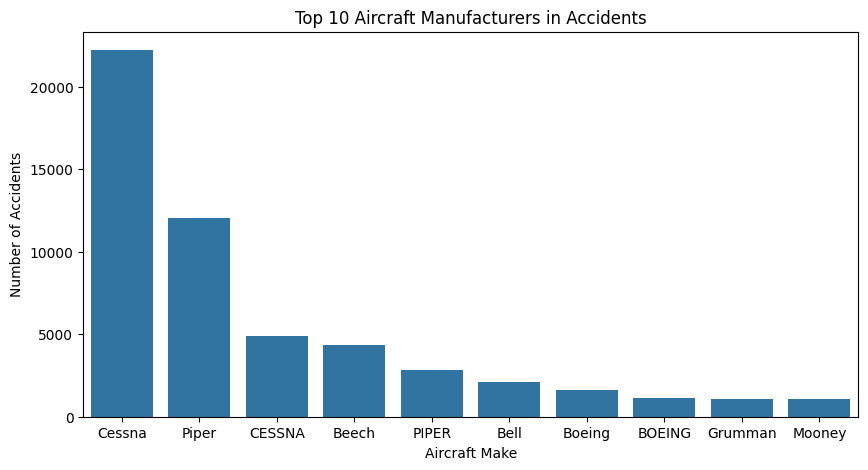

In [358]:
#top_makes_models = df_Aviation_Risk_Analysis_Data['Make'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_makes_models.index, y=top_makes_models.values)
plt.title("Top 10 Aircraft Manufacturers in Accidents")
plt.ylabel("Number of Accidents")
plt.xlabel("Aircraft Make")
plt.show()

- The graph shows that Cessna, Piper, and Beech recorded over 2000 accidents, therefore they are the most common aircrafts.

#### 2. Level of Damage of an Aircraft after an accident

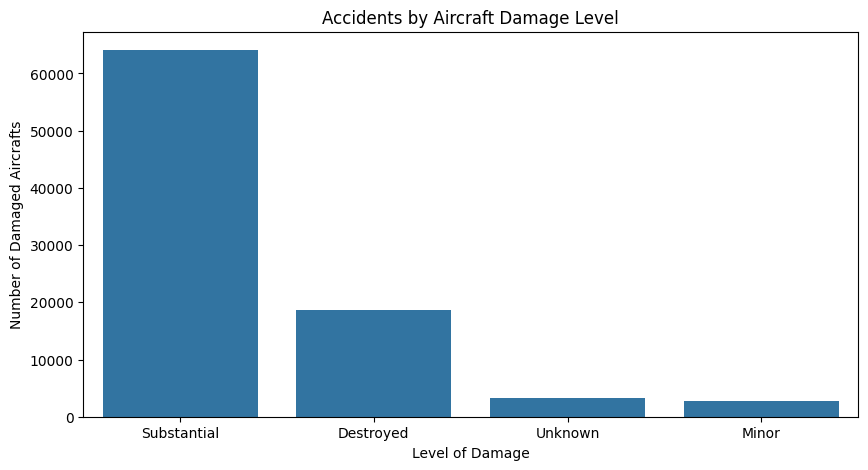

In [359]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_Aviation_Risk_Analysis_Data, x='Aircraft.damage', order=df_Aviation_Risk_Analysis_Data['Aircraft.damage'].value_counts().index)
plt.title("Accidents by Aircraft Damage Level")
plt.ylabel("Number of Damaged Aircrafts")
plt.xlabel("Level of Damage")
plt.show()

- majority of the aircrafts ended in substantial damages. On the other hand not all were totaly damaged while very few had minor damages.

#### 3. Impact of Weather on Accidents

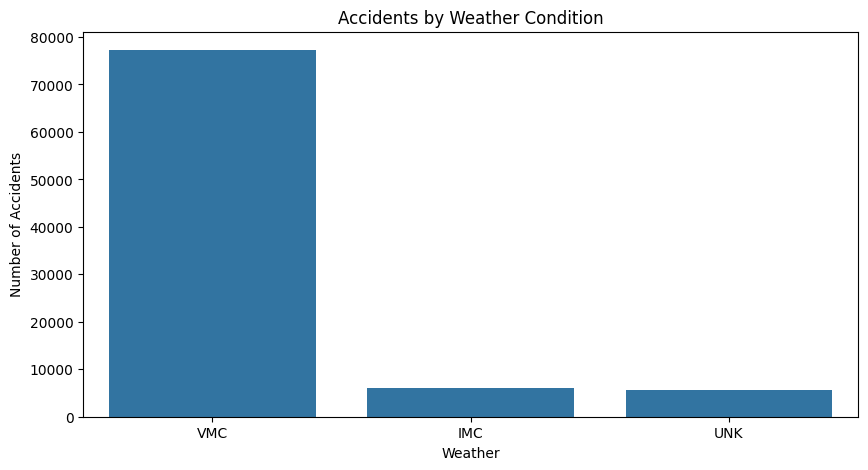

In [360]:
weather_condition_accidents_counts = df_Aviation_Risk_Analysis_Data['Weather.Condition'].value_counts().to_frame()

plt.figure(figsize=(10,5))
sns.barplot(data=weather_condition_accidents_counts ,x='Weather.Condition', y=weather_condition_accidents_counts.columns[0])
plt.title('Accidents by Weather Condition')
plt.xlabel('Weather')
plt.ylabel('Number of Accidents')
plt.show()

- Many accidents are experienced during VMC

#### 4. Accidents by Engine Types

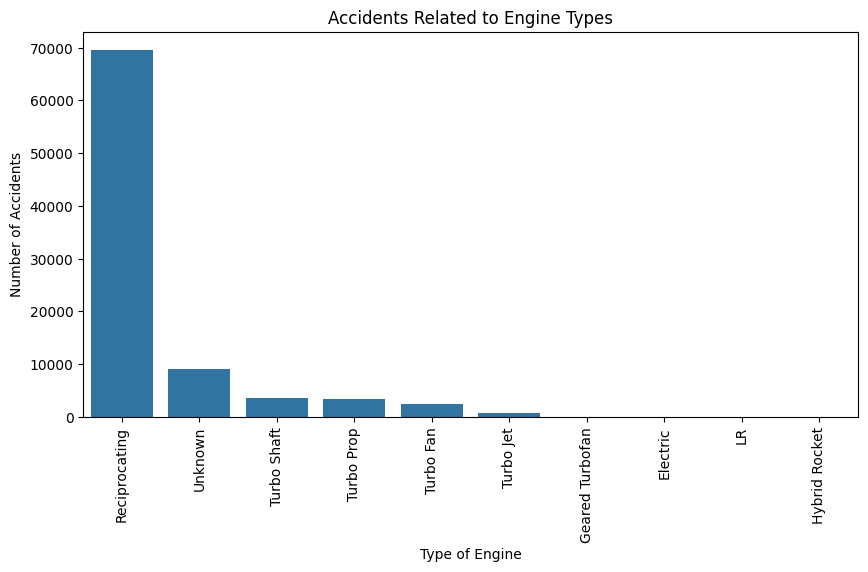

In [361]:
engine_counts = df_Aviation_Risk_Analysis_Data['Engine.Type'].value_counts().to_frame()
plt.figure(figsize = (10,5))
sns.barplot(data=engine_counts, x='Engine.Type', y=engine_counts.columns[0])
plt.title('Accidents Related to Engine Types')
plt.ylabel('Number of Accidents')
plt.xlabel('Type of Engine')
plt.xticks(rotation=90)
plt.show()

- Reciprocating Engines caused the most number of accidents, on the other hand, Turbo Shafts, Turbo Prop, Turbo Fan and Turbo Jet registered minimal accidents.
- Small piston planes use use reciprocating engine while Turbofan and Turbo Jet Engines are used in business jets. 

#### 5. Analysis by Injury Severity

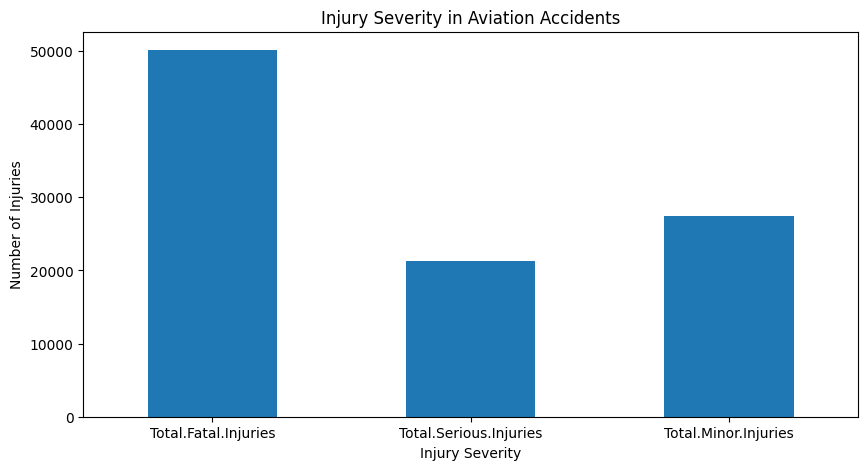

In [362]:
# Injury distribution
injury_severity = df_Aviation_Risk_Analysis_Data[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries',]].sum()

injury_severity.plot(kind='bar', figsize=(10,5))
plt.title('Injury Severity in Aviation Accidents')
plt.ylabel('Number of Injuries')
plt.xlabel('Injury Severity')
plt.xticks(rotation=0)
plt.show()

#### 6. Analysis by Pupose of Flight

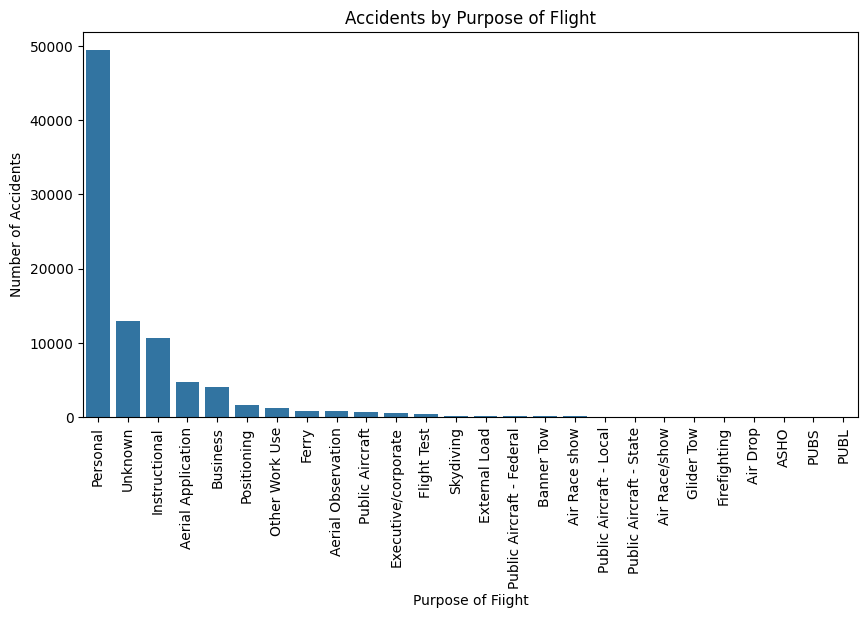

In [363]:
purpose_of_flight_counts = df_Aviation_Risk_Analysis_Data['Purpose.of.flight'].value_counts().to_frame()

plt.figure(figsize=(10,5))
sns.barplot(data=purpose_of_flight_counts, x='Purpose.of.flight', y=purpose_of_flight_counts.columns[0])
plt.title('Accidents by Purpose of Flight')
plt.ylabel('Number of Accidents')
plt.xlabel('Purpose of Fiight')
plt.xticks(rotation=90)
plt.show()

- More accidents are experienced when the purpose is to fly the aircraft personally. This could be associated to the fact that private pilots are not professional and tend to fly cassually and carelessly

#### 7. Analysis by Phase of FLight

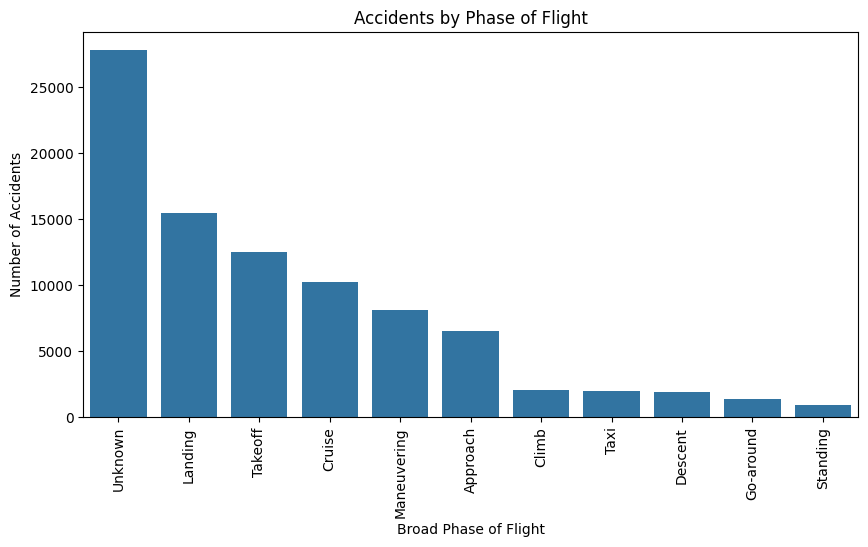

In [364]:
phase_of_flights_counts = df_Aviation_Risk_Analysis_Data['Broad.phase.of.flight'].value_counts().to_frame()

plt.figure(figsize=(10,5))
sns.barplot(data=phase_of_flights_counts, x='Broad.phase.of.flight', y=phase_of_flights_counts.columns[0],)
plt.title('Accidents by Phase of Flight')
plt.ylabel('Number of Accidents')
plt.xlabel('Broad Phase of Flight')
plt.xticks(rotation=90)
plt.show()

In [365]:
#Export dataframe to csv for visualization using Tableau
df_Aviation_Risk_Analysis_Data.to_csv('data/cleaned_aviation_data.csv', index=False)

# Recommendations
- Turbofan Engines which are mostly used for commercial aircrafts caused fewer accidents compared to reciprocating which are primarily piston based and commonly used for small jets. Therefore the organization should consider Purchasing Turbo Engines. On the other hand Engines like Electric and LR and Hybrid Rocket recorded low accidents. They caould also be considered
- It is important to know that many accidents in the aviation sector occur during landing and takeoff. This means that the organization should consider training their pilots frequetly not only on safety procedures but also profeciency and keenness.
- More accidents are experienced when the purpose is to fly the aircraft personally. This could be associated to the fact that private pilots are not professional and tend to fly cassually and carelessly. The organization should enact rules that will allow private customers to be flown by a professional pilot provoded by the organization.